In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

# Import packages

In [2]:
import pandas as pd
import folium
import branca.colormap as cm
import plotly.graph_objects as go
from topicmod.EDA.analyse_viz import *

# Loading data

In [3]:
df_ids = load_df_ids()

# Plotting functions

In [4]:
def plot_nbr_agence(df_ids, nom_banque):
    grouped_df = nbr_agence(df_ids)
    df_draw = note_agence(grouped_df, nom_banque)
    fig = go.Figure(data=[
        go.Bar(name='Note <= 3', x=df_draw['nom_etab'], y=df_draw['rating <= 3'],marker=dict(color='red')),
        go.Bar(name='Note > 3', x=df_draw['nom_etab'], y=df_draw['rating > 3'],marker=dict(color='green'))
    ])
    # Change the bar mode
    fig.update_layout(barmode='stack',autosize=False,
        width=800,
        height=500,
        title="Nombre d'agences par établissement",
        xaxis_title="Nom de l'établissement",
        yaxis_title="Nombre d'agences",
        legend_title="Note d'agence")
    return fig

def BanqtoMap(dft, nom_banque, lat_col='Latitude', lon_col='Longitude', zoom_start=6,\
              plot_points=False, pt_radius=1, \
              plot_circles=False):

    if nom_banque=="Caisse d'Epargne":
        df = df_bank_circles(dft, nom_banque)
        df_pt = df_bank_points(dft, nom_banque)
        color_code = "#BD1816"
    elif nom_banque=="Banque Populaire":
        df = df_bank_circles(dft, nom_banque)
        df_pt = df_bank_points(dft, nom_banque)
        color_code = "#0e5caa"
    else:
        print("Please indicate 'Caisse d'Epargne' or 'Banque Populaire' as nom_banque")
        
    
    ## center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = folium.Map(tiles = "Stamen Toner",
                          location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    colormap = cm.LinearColormap(['red','yellow', 'green'],
                       vmin=1.0, vmax=5.0)
    colormap.caption = "Note Agence"
    #add points to map
    
    if plot_points:
        for _, row in df_pt.iterrows():
            folium.CircleMarker(
                location=[row[lat_col], row[lon_col]],
                radius= 3,
                color=colormap(row['rating']),
                popup=folium.Popup("Nom Etablissement : "+row["nom_etab"]+
                      "<br> Nom Agence : <b>"+row["nom_agence"]+
                      "</b><br> Note : "+ str(row["rating"]),
                      min_width=300,max_width=300),
                fill_opacity=1,
                fill_color=colormap(row['rating'])
            ).add_to(curr_map)
        colormap.add_to(curr_map)
    
    # add circles to map
    if plot_circles:
        for _, row in df.iterrows():
            folium.CircleMarker([row[lat_col], row[lon_col]],
                                radius=0.005* row["user_ratings_total"], #5*row[heat_map_weights_col],
                                popup=folium.Popup("<b>"+row["nom_etab"]+"</b>"
                                                        + "<br> Note moyenne : " + "{:.2f}".format(row["avg_rating"])
                                                    + "<br> Nombre moyen des avis : " + "{:.0f}".format(row["avg_nbr_ratings"])
                                                    + "<br> Nombre total des avis : " + "{:.0f}".format(row["user_ratings_total"])
                                                    + "<br> Nombre des agences avec note > 3 : " + str(row["rating > 3"])
                                                       +"/"+str(row["nbr_agence"]),
                                                   min_width=300,max_width=300),
                                fill_color=color_code,
                                color = color_code,
                               ).add_to(curr_map)
    return curr_map



In [5]:
option = 'Banque Populaire'

# Nombre d'agence par établissement

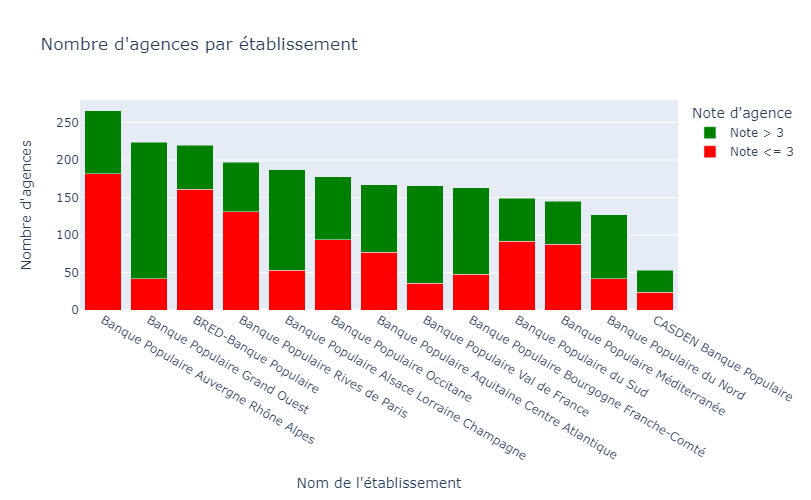

In [6]:
fig = plot_nbr_agence(df_ids, option)
fig.show()

# Cartographie des notes des agences

In [7]:
BanqtoMap(df_ids, option, plot_points=True, plot_circles=False) 

In [8]:
BanqtoMap(df_ids, option, plot_points=False, plot_circles=True) 